## Katrina Hernandez: Midterm, Linear Regression

In [1]:
import os
os.getcwd()

'C:\\Users\\katri\\Desktop\\Midterm'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
mpgdata = pd.read_csv('mpg.csv')
mpgdata.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [4]:
mpgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


mpg: dependent variable
| name: non-predictor
| everything else: explantory variables

In [5]:
mpgdata.describe()

,mpg,cylinders,displacement,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


## Addressing missing data

In [6]:
## horsepower is object, not int, because of missing values expressed as "?"- will replace with mean
# because 5 of 6 missing values are 4 cyclinder cars, I will pick the mean for 4 cylinder cars only
# in hopes of being a bit more precise
mpgdata[mpgdata['horsepower'] == "?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [7]:
#for comparison to 4 clylinder avg horsepower below
pd.to_numeric(mpgdata[mpgdata['horsepower'] != "?"]['horsepower']).mean()

104.46938775510205

In [8]:
#find avg horsepower for 4 cylinder vehicles
hpNotMissing = mpgdata[mpgdata['horsepower'] != "?"]
cyl4avgHP = pd.to_numeric(hpNotMissing[hpNotMissing['cylinders'] == 4]['horsepower']).mean()
cyl4avgHP

78.28140703517587

In [9]:
#replace ?s in horsepower column with average for 4 cylinder vehicles
mpgdata['horsepower'].replace("?", cyl4avgHP)
mpgdata['horsepower'].describe()

count     398
unique     94
top       150
freq       22
Name: horsepower, dtype: object

## Cleaning and reformatting data

In [10]:
## convert years into "years old" in max year, 1982
mpgdata['model_year'].max()
mpgdata['yearsOld']  = 82 - mpgdata['model_year']
mpgdata.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,yearsOld
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,12
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,12
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,12


In [11]:
#origin=3- asian carmakers- create colum called apacMade (Made in APAC)
def apac(mpgdata):
  if mpgdata['origin'] == 3:
    return 1
  else:
    return 0

mpgdata['apacMade'] = mpgdata.apply(apac, axis=1)

In [12]:
#origin=2- asian carmakers- create colum called emeaMade (Made in EMEA)
def emea(mpgdata):
  if mpgdata['origin'] == 2:
    return 1
  else:
    return 0

mpgdata['emeaMade'] = mpgdata.apply(emea, axis=1)

In [13]:
# cylinders is not continuous so considering grouping
mpgdata['cylinders'].unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [14]:
## 5/6 appears to be a natural place to cut this data
mpgdata['name'].groupby(mpgdata['cylinders']).count()

cylinders
3      4
4    204
5      3
6     84
8    103
Name: name, dtype: int64

In [15]:
#create a binary numeric column for 3, 4, and 5 cylinder vehicles
def lowcyl(mpgdata):
  if mpgdata['cylinders'] < 6:
    return 1
  else:
    return 0

mpgdata['lessthan6cyl'] = mpgdata.apply(lowcyl, axis=1)

In [16]:
#create a binary numeric column for 6 and 8 cylinder vehicles
def highcyl(mpgdata):
  if mpgdata['cylinders'] >= 6:
    return 1
  else:
    return 0

mpgdata['atleast6cyl'] = mpgdata.apply(highcyl, axis=1)

In [17]:
#name is not going to have enough distinct columns to be helpful- split to get maker
mpgdata['make'] = mpgdata.name.str.split().str.get(0)
mpgdata['make'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac', 'dodge',
       'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw',
       'chevy', 'hi', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler',
       'mazda', 'volvo', 'renault', 'toyouta', 'maxda', 'honda', 'subaru',
       'chevroelt', 'capri', 'vw', 'mercedes-benz', 'cadillac', 'mercedes',
       'vokswagen', 'triumph', 'nissan'], dtype=object)

In [18]:
#noticed some typos and abbreviations in the names- clean them up
mpgdata['make'].replace('chevy', 'chevrolet', inplace=True)
mpgdata['make'].replace('chevroelt', 'chevrolet', inplace=True)
mpgdata['make'].replace('toyouta', 'toyota', inplace=True)
mpgdata['make'].replace('maxda', 'mazda', inplace=True)
mpgdata['make'].replace('mercedes', 'mercedes-benz', inplace=True)
mpgdata['make'].replace('vokswagen', 'volkswagen', inplace=True)
mpgdata['make'].replace('vw', 'volkswagen', inplace=True)
mpgdata['make'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac', 'dodge',
       'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw',
       'hi', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler', 'mazda',
       'volvo', 'renault', 'honda', 'subaru', 'capri', 'mercedes-benz',
       'cadillac', 'triumph', 'nissan'], dtype=object)

In [19]:
#there are a lot of makes for each country of origin so probably makes more sense to leverage origin instead of creating a 
#dummy variable for every single make
makeCountry = mpgdata[['origin', 'make']].drop_duplicates()
makeCountry.sort_values('origin')
makeCountry.head()

,origin,make
0,1,chevrolet
1,1,buick
2,1,plymouth
3,1,amc
4,1,ford


In [20]:
##taking another look at data after cleaning
mpgdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 15 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
yearsOld        398 non-null int64
apacMade        398 non-null int64
emeaMade        398 non-null int64
lessthan6cyl    398 non-null int64
atleast6cyl     398 non-null int64
make            398 non-null object
dtypes: float64(3), int64(9), object(3)
memory usage: 46.7+ KB


## Looking at data graphically

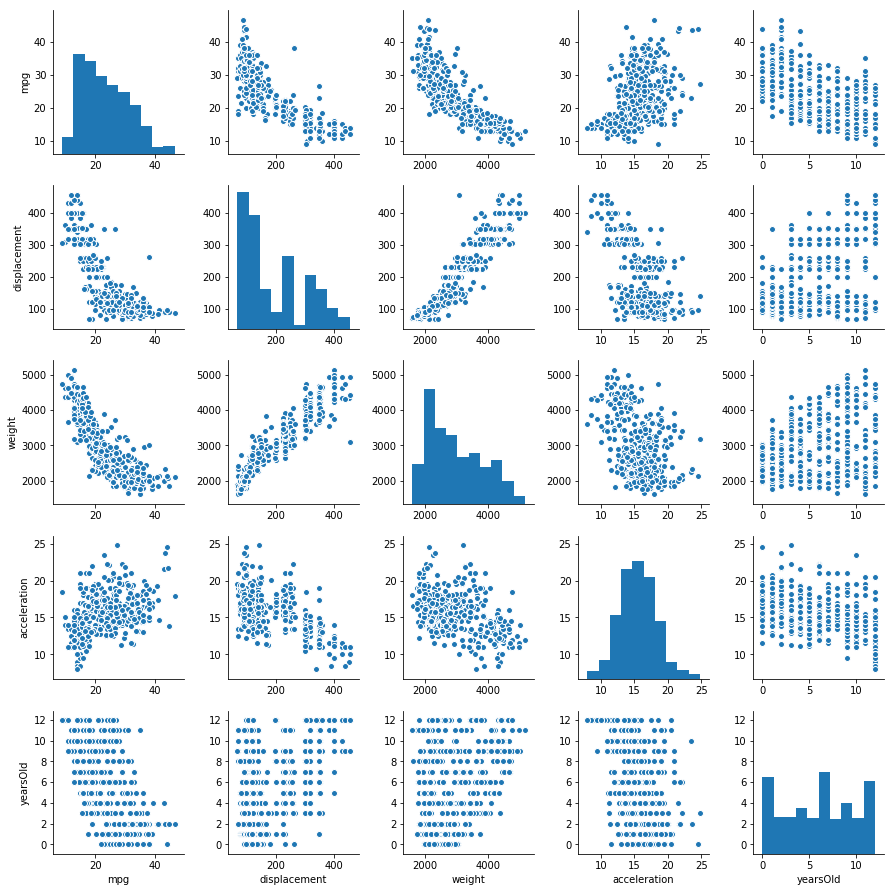

In [21]:
##looking first at MPG versus the continuous variables
sns.pairplot(mpgdata[['mpg', 'displacement', 'weight', 'acceleration', 'yearsOld']])

Notes from above: 
1. MPG, displacement, and weight are all right-skewed and could benefit from normalization
2. Strong correlation between weight and displacement so this is a sign of Multicollinearity- may want to use one or the other only
3. Weight and displacement are correlated to MPG, but relationship may be more quadratic than linear
4. Acceleration may be loosely correlated- weaker than displacement
5. Age of the car also appears to be a factor in MPG

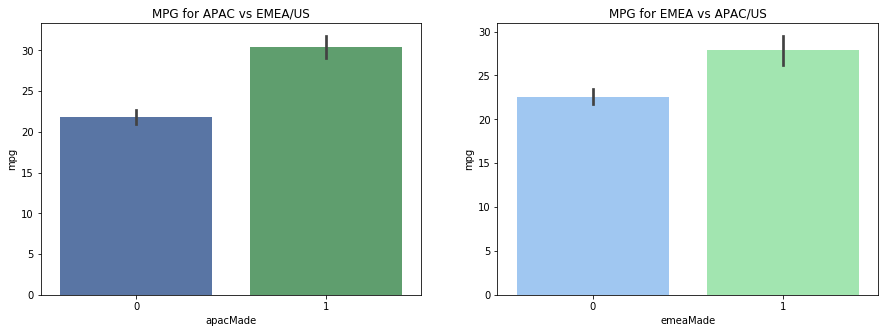

In [22]:
## looking at average MPG vs the binary variables- apacMade, emeaMade, lessthan6cyl
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('MPG for APAC vs EMEA/US')
sns.barplot(x='apacMade',y='mpg',data=mpgdata, palette = 'deep')
ax2 = plt.subplot(122)
ax2.set_title('MPG for EMEA vs APAC/US')
sns.barplot(x='emeaMade',y='mpg',data=mpgdata, palette='pastel')

On average, cars made in Asia, see ~8 more miles to the gallon. than cars made in other parts of the world in this dataset. Additionally, cars made in Europe, see ~5 more miles to the gallon than cars made in other parts of the world. So, country of origin may be correlated with MPG.

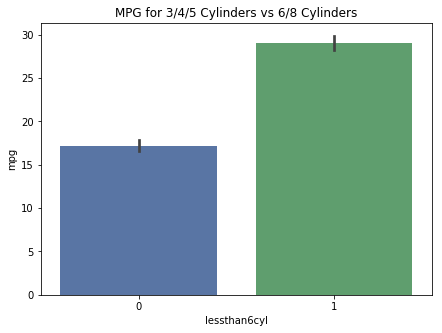

In [23]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax1 = plt.subplot(111)
ax1.set_title('MPG for 3/4/5 Cylinders vs 6/8 Cylinders')
sns.barplot(x='lessthan6cyl',y='mpg',data=mpgdata, palette='deep')

On average, cars with less than 6 cylinders see nearly double MPG.

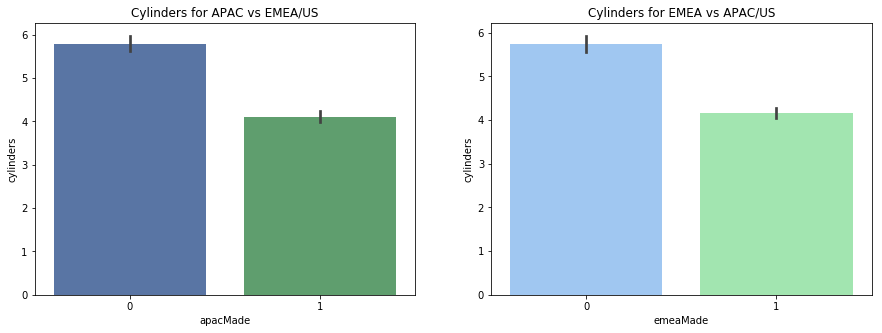

In [24]:
## looking to see if there is correlation between region and number cylinders
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Cylinders for APAC vs EMEA/US')
sns.barplot(x='apacMade',y='cylinders',data=mpgdata, palette = 'deep')
ax1 = plt.subplot(122)
ax1.set_title('Cylinders for EMEA vs APAC/US')
sns.barplot(x='emeaMade',y='cylinders',data=mpgdata, palette='pastel')

It appears that cars made in APAC and EMEA have fewer cylinders on average so it is important to look at the previous avg MPG by country and low vs high cylinders.

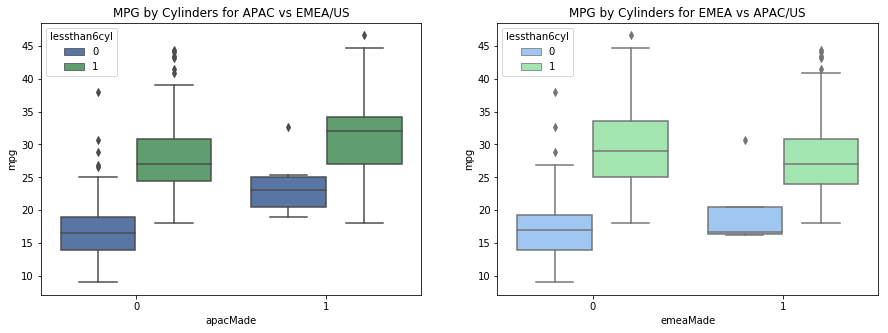

In [25]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('MPG by Cylinders for APAC vs EMEA/US')
sns.boxplot(x="apacMade", y="mpg", hue="lessthan6cyl",data=mpgdata, palette="deep")
ax2 = plt.subplot(122)
ax2.set_title('MPG by Cylinders for EMEA vs APAC/US')
sns.boxplot(x="emeaMade", y="mpg", hue="lessthan6cyl",data=mpgdata, palette="pastel")

It appears that when cylinders are held constant, Asian carmakers in this dataset still have a higher avg MPG than carmakers in the US and EMEA.

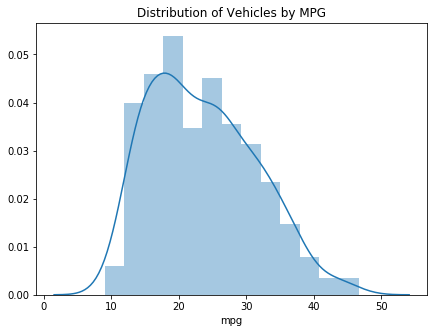

In [26]:
#closer look at distribution of MPG
fig, ax1 = plt.subplots(figsize=(7,5))
ax1 = plt.subplot(111)
ax1.set_title('Distribution of Vehicles by MPG')
sns.distplot(mpgdata['mpg'])

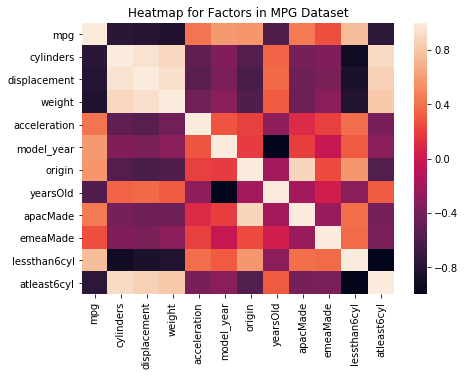

In [27]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax1 = plt.subplot(111)
ax1.set_title('Heatmap for Factors in MPG Dataset')
sns.heatmap(mpgdata.corr())

Highest positive correlation with MPG is less than 6 cylinders and yearsOld.
Highest negative correlations are weight, displacement, and at least 6 cylinders.
There is correlation between cylinders, displacement, and weight.

## Modeling
### Model 1: establishing a baseline Linear Regression

Starting linear regression with the factors that seem most highly correlated with mpg in the visualizations above, omitting any that are likely to cause multicollinearity.

In [28]:
X = mpgdata[['weight', 'acceleration', 'yearsOld',
               'apacMade', 'lessthan6cyl']]
y = mpgdata['mpg']

In [29]:
from sklearn.model_selection import train_test_split
# training/testing split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
## first trying the model without normalization
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
# print the intercept
print(model1.intercept_)

42.4480879042


In [32]:
coeff_df = pd.DataFrame(model1.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
weight,-0.005264
acceleration,-0.010111
yearsOld,-0.769304
apacMade,1.001318
lessthan6cyl,2.391744


In [33]:
test_predictionsM1 = model1.predict(X_test)
train_predictionsM1 = model1.predict(X_train)

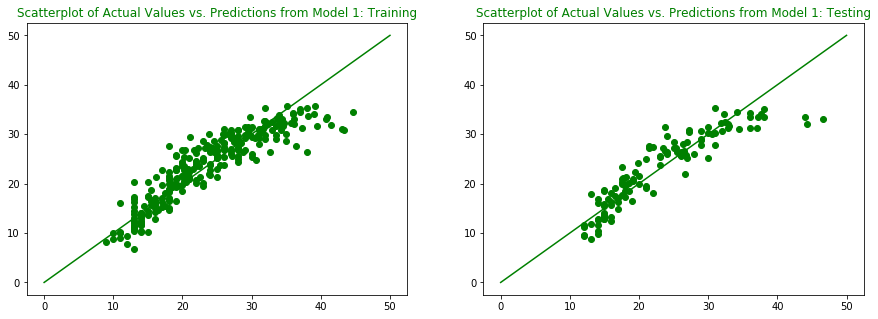

In [34]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Scatterplot of Actual Values vs. Predictions from Model 1: Training', color='g')
plt.scatter(y_train,train_predictionsM1, color='g')
plt.plot([0,50],[0,50], color='g')
ax2 = plt.subplot(122)
ax2.set_title('Scatterplot of Actual Values vs. Predictions from Model 1: Testing', color='g')
plt.scatter(y_test,test_predictionsM1, color='g')
plt.plot([0,50],[0,50], color='g')

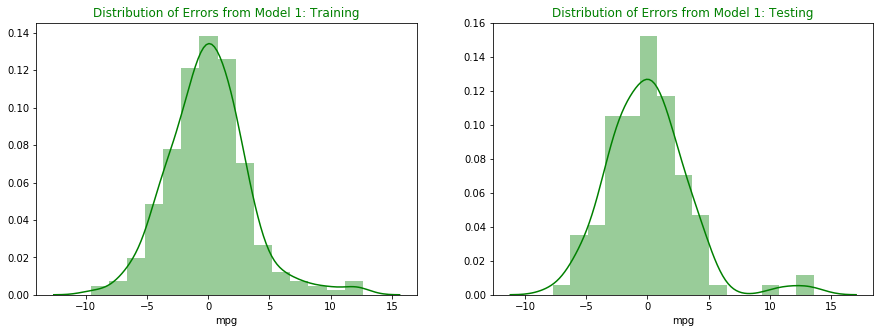

In [35]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Errors from Model 1: Training', color='g')
sns.distplot((y_train-train_predictionsM1),bins=15, color='g')
ax2 = plt.subplot(122)
ax2.set_title('Distribution of Errors from Model 1: Testing', color='g')
sns.distplot((y_test-test_predictionsM1),bins=15, color='g')

### Model 1: comparing RMSE and adjust R squared for Training vs Testing

In [36]:
from sklearn import metrics
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, train_predictionsM1)),4))

Training RMSE: 3.2913


In [37]:
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_predictionsM1)),4))

Testing RMSE: 3.3154


In [38]:
print('R squared (Train):', round(model1.score(X_train, y_train),4), 'Adjusted R squared (Train):',
      round(1 - (1-model1.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4))

R squared (Train): 0.8198 Adjusted R squared (Train): 0.8165


In [39]:
print('R squared (Test):', round(model1.score(X_test, y_test),4), 'Adjusted R squared (Test):'
      , round(1 - (1-model1.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4))

R squared (Test): 0.8246 Adjusted R squared (Test): 0.8169


~82% variation in both the training and testing datasets can be explained by variation in weight, acceleration, yearsOld, apacMade, and lessthan6cyl

### Model 2: Linear regression with normalization

In [40]:
## with normalization
from sklearn.linear_model import LinearRegression
model2 = LinearRegression(normalize=True)
model2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [41]:
# print line of best fit for Model 2
print(model2.intercept_)
coeff_df = pd.DataFrame(model2.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

42.4480879042
              Coefficient
weight          -0.005264
acceleration    -0.010111
yearsOld        -0.769304
apacMade         1.001318
lessthan6cyl     2.391744


In [42]:
test_predictionsM2 = model2.predict(X_test)
train_predictionsM2 = model2.predict(X_train)

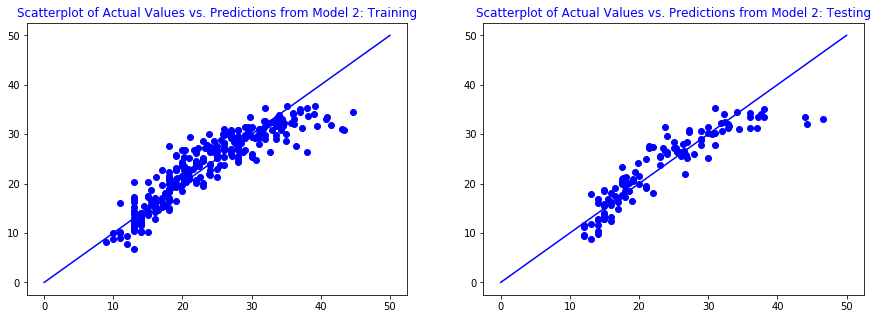

In [43]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Scatterplot of Actual Values vs. Predictions from Model 2: Training', color='b')
plt.scatter(y_train,train_predictionsM2, color='b')
plt.plot([0,50],[0,50], color='b')
ax2 = plt.subplot(122)
ax2.set_title('Scatterplot of Actual Values vs. Predictions from Model 2: Testing', color='b')
plt.scatter(y_test,test_predictionsM2, color='b')
plt.plot([0,50],[0,50], color='b')

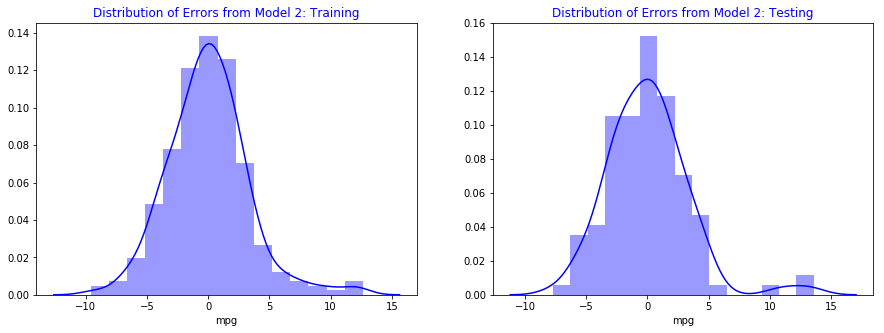

In [44]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Errors from Model 2: Training', color='b')
sns.distplot((y_train-train_predictionsM2),bins=15, color='b')
ax2 = plt.subplot(122)
ax2.set_title('Distribution of Errors from Model 2: Testing', color='b')
sns.distplot((y_test-test_predictionsM2),bins=15, color='b')

### Model 2: comparing RMSE and adjust R squared for Training vs Testing

In [45]:
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, train_predictionsM2)),4))

Training RMSE: 3.2913


In [46]:
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_predictionsM2)),4))

Testing RMSE: 3.3154


In [47]:
print('R squared (Train):', round(model2.score(X_train, y_train),4), 'Adjusted R squared (Train):',
      round(1 - (1-model2.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4))

R squared (Train): 0.8198 Adjusted R squared (Train): 0.8165


In [48]:
print('R squared (Test):', round(model2.score(X_test, y_test),4), 'Adjusted R squared (Test):'
      , round(1 - (1-model2.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4))

R squared (Test): 0.8246 Adjusted R squared (Test): 0.8169


### Model 3: Linear Regression with Feature Scaling

In [49]:
## with feature scaling
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
model3 = LinearRegression()
model3.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
# print line of best fit for Model 3
print(model3.intercept_)
coeff_df = pd.DataFrame(model3.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

23.6478417266
              Coefficient
weight          -4.394749
acceleration    -0.027891
yearsOld        -2.831860
apacMade         0.401604
lessthan6cyl     1.189791


In [52]:
train_predictionsM3 = model3.predict(X_train_scaled)

In [53]:
test_predictionsM3 = model3.predict(X_test_scaled)

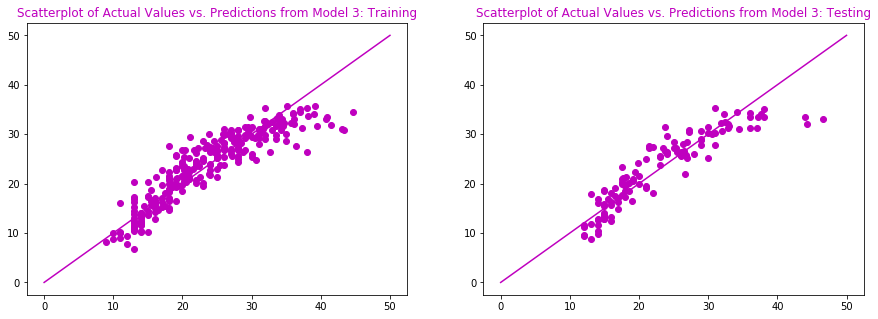

In [54]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Scatterplot of Actual Values vs. Predictions from Model 3: Training', color='m')
plt.scatter(y_train,train_predictionsM3, color='m')
plt.plot([0,50],[0,50], color='m')
ax2 = plt.subplot(122)
ax2.set_title('Scatterplot of Actual Values vs. Predictions from Model 3: Testing', color='m')
plt.scatter(y_test,test_predictionsM3, color='m')
plt.plot([0,50],[0,50], color='m')

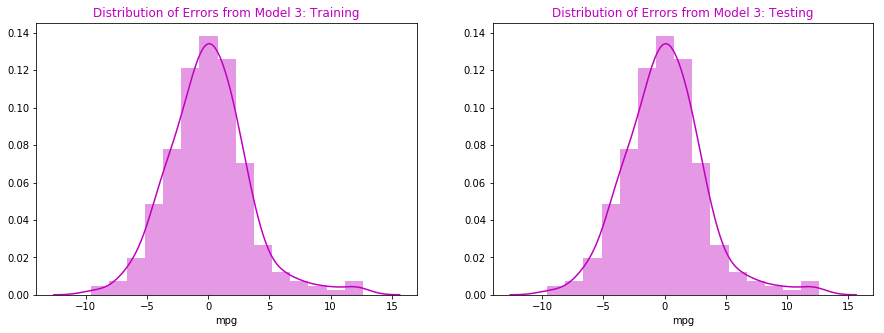

In [55]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Errors from Model 3: Training', color='m')
sns.distplot((y_train-train_predictionsM3),bins=15, color='m')
ax1 = plt.subplot(122)
ax1.set_title('Distribution of Errors from Model 3: Testing', color='m')
sns.distplot((y_train-train_predictionsM3),bins=15, color='m')

In [56]:
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, train_predictionsM3)),4))

Training RMSE: 3.2913


In [57]:
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_predictionsM3)),4))

Testing RMSE: 3.3154


In [58]:
print('R squared (Train):', round(model3.score(X_train_scaled, y_train),4), 'Adjusted R squared (Train):',
      round(1 - (1-model3.score(X_train_scaled, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4))

R squared (Train): 0.8198 Adjusted R squared (Train): 0.8165


In [59]:
print('R squared (Test):', round(model3.score(X_test_scaled, y_test),4), 'Adjusted R squared (Test):'
      , round(1 - (1-model3.score(X_test_scaled, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4))

R squared (Test): 0.8246 Adjusted R squared (Test): 0.8169


### Model 4: Linear Regression with Feature Transformation: adding weight squared

In [60]:
# since weight appeared to have quadratic shape, adding weight squared
mpgdata['weightSq'] = mpgdata['weight']**2
mpgdata[['weight','weightSq']].head(10)

,weight,weightSq
0,3504,12278016
1,3693,13638249
2,3436,11806096
3,3433,11785489
4,3449,11895601
5,4341,18844281
6,4354,18957316
7,4312,18593344
8,4425,19580625
9,3850,14822500


In [61]:
X = mpgdata[['weight', 'weightSq', 'acceleration', 'yearsOld',
               'apacMade', 'lessthan6cyl']]
y = mpgdata['mpg']

In [62]:
from sklearn.model_selection import train_test_split
# training/testing split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
## going back to no normalization since normalization did not positively impact fit
from sklearn.linear_model import LinearRegression
model4 = LinearRegression()
model4.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
# print line of best fit for Model 4
print(model4.intercept_)
coeff_df = pd.DataFrame(model4.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

65.789126955
              Coefficient
weight          -0.019981
weightSq         0.000002
acceleration     0.066196
yearsOld        -0.852929
apacMade         0.014133
lessthan6cyl     0.747073


In [65]:
test_predictionsM4 = model4.predict(X_test)
train_predictionsM4 = model4.predict(X_train)

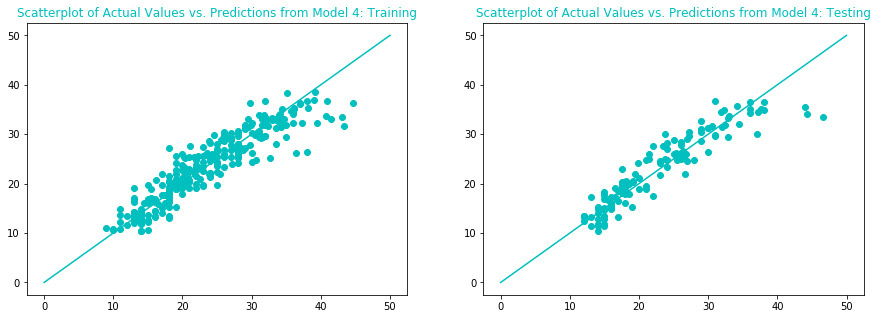

In [66]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Scatterplot of Actual Values vs. Predictions from Model 4: Training', color='c')
plt.scatter(y_train,train_predictionsM4, color='c')
plt.plot([0,50],[0,50], color='c')
ax2 = plt.subplot(122)
ax2.set_title('Scatterplot of Actual Values vs. Predictions from Model 4: Testing', color='c')
plt.scatter(y_test,test_predictionsM4, color='c')
plt.plot([0,50],[0,50], color='c')

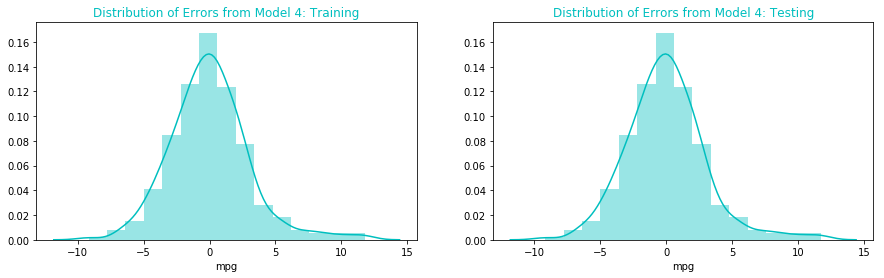

In [67]:
fig, ax1 = plt.subplots(figsize=(15,4))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Errors from Model 4: Training', color='c')
sns.distplot((y_train-train_predictionsM4),bins=15, color='c')
ax1 = plt.subplot(122)
ax1.set_title('Distribution of Errors from Model 4: Testing', color='c')
sns.distplot((y_train-train_predictionsM4),bins=15, color='c')

In [68]:
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, train_predictionsM4)),4))

Training RMSE: 3.001


In [69]:
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_predictionsM4)),4))

Testing RMSE: 2.9794


In [70]:
print('R squared (Train):', round(model4.score(X_train, y_train),4), 'Adjusted R squared (Train):',
      round(1 - (1-model4.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4))

R squared (Train): 0.8502 Adjusted R squared (Train): 0.8469


In [71]:
print('R squared (Test):', round(model4.score(X_test, y_test),4), 'Adjusted R squared (Test):'
      , round(1 - (1-model4.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4))

R squared (Test): 0.8584 Adjusted R squared (Test): 0.8508


The addition of weight squared results in a better model fit on both the training and testing data sets.

### Model 5: Linear Regression with Feature Transformation: switching "cylinders" for "less than 6 cylinders"

In [72]:
X = mpgdata[['weight', 'weightSq', 'acceleration', 'yearsOld',
               'apacMade', 'cylinders']]
y = mpgdata['mpg']

In [73]:
from sklearn.model_selection import train_test_split
# training/testing split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [74]:
from sklearn.linear_model import LinearRegression
model5 = LinearRegression()
model5.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
# print line of best fit for Model 5
print(model5.intercept_)
coeff_df = pd.DataFrame(model5.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

68.184095046
              Coefficient
weight          -0.020920
weightSq         0.000002
acceleration     0.073371
yearsOld        -0.859303
apacMade        -0.021426
cylinders       -0.052957


In [76]:
test_predictionsM5 = model5.predict(X_test)
train_predictionsM5 = model5.predict(X_train)

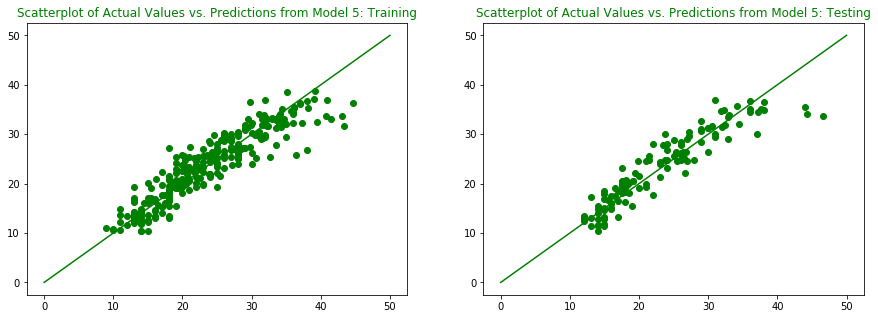

In [77]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Scatterplot of Actual Values vs. Predictions from Model 5: Training', color='g')
plt.scatter(y_train,train_predictionsM5, color='g')
plt.plot([0,50],[0,50], color='g')
ax2 = plt.subplot(122)
ax2.set_title('Scatterplot of Actual Values vs. Predictions from Model 5: Testing', color='g')
plt.scatter(y_test,test_predictionsM5, color='g')
plt.plot([0,50],[0,50], color='g')

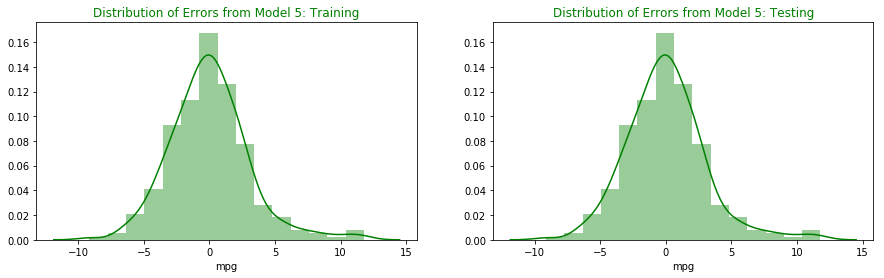

In [78]:
fig, ax1 = plt.subplots(figsize=(15,4))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Errors from Model 5: Training', color='g')
sns.distplot((y_train-train_predictionsM5),bins=15, color='g')
ax1 = plt.subplot(122)
ax1.set_title('Distribution of Errors from Model 5: Testing', color='g')
sns.distplot((y_train-train_predictionsM5),bins=15, color='g')

In [79]:
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, train_predictionsM5)),4))

Training RMSE: 3.0076


In [80]:
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_predictionsM5)),4))

Testing RMSE: 3.0002


In [81]:
print('R squared (Train):', round(model5.score(X_train, y_train),4), 'Adjusted R squared (Train):',
      round(1 - (1-model5.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4))

R squared (Train): 0.8496 Adjusted R squared (Train): 0.8462


In [82]:
print('R squared (Test):', round(model5.score(X_test, y_test),4), 'Adjusted R squared (Test):'
      , round(1 - (1-model5.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4))

R squared (Test): 0.8564 Adjusted R squared (Test): 0.8488


This fit is not quite as good as Model4 proving that the transformation of cylinders to "lessthan6cyl" is worth keeping.

### Next, I will take a look at test significance of the explanatory variables to see if any could be excluded.

### Model 6: Removing acceleration from Model 4

In [83]:
from sklearn.feature_selection import f_regression

print(X.columns, f_regression(X,y))

Index(['weight', 'weightSq', 'acceleration', 'yearsOld', 'apacMade',
       'cylinders'],
      dtype='object') (array([ 888.85068265,  733.47006835,   84.95770025,  199.98200802,
         96.24236669,  597.07704785]), array([  2.97279956e-103,   3.71901813e-092,   1.82309154e-018,
         4.84493581e-037,   1.75813203e-020,   4.50399225e-081]))


This indicates that all variables are very significant so I wouldn't expect to improve fit by removing anything. I'll test this by removing acceleration since it has the lowest f score.

In [84]:
X = mpgdata[['weight', 'weightSq', 'yearsOld',
               'apacMade', 'lessthan6cyl']]
y = mpgdata['mpg']

In [85]:
from sklearn.model_selection import train_test_split
# training/testing split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [86]:
from sklearn.linear_model import LinearRegression
model6 = LinearRegression()
model6.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [87]:
# print line of best fit for Model 6
print(model6.intercept_)
coeff_df = pd.DataFrame(model6.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

66.5798492877
              Coefficient
weight          -0.019783
weightSq         0.000002
yearsOld        -0.860631
apacMade        -0.004387
lessthan6cyl     0.836773


In [88]:
test_predictionsM6 = model6.predict(X_test)
train_predictionsM6 = model6.predict(X_train)

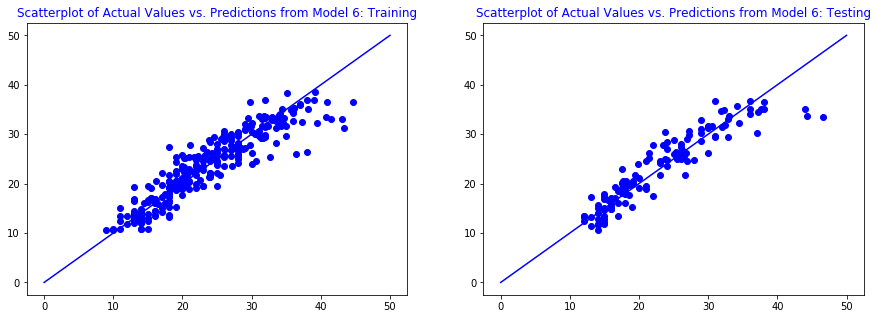

In [89]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Scatterplot of Actual Values vs. Predictions from Model 6: Training', color='b')
plt.scatter(y_train,train_predictionsM6, color='b')
plt.plot([0,50],[0,50], color='b')
ax2 = plt.subplot(122)
ax2.set_title('Scatterplot of Actual Values vs. Predictions from Model 6: Testing', color='b')
plt.scatter(y_test,test_predictionsM6, color='b')
plt.plot([0,50],[0,50], color='b')

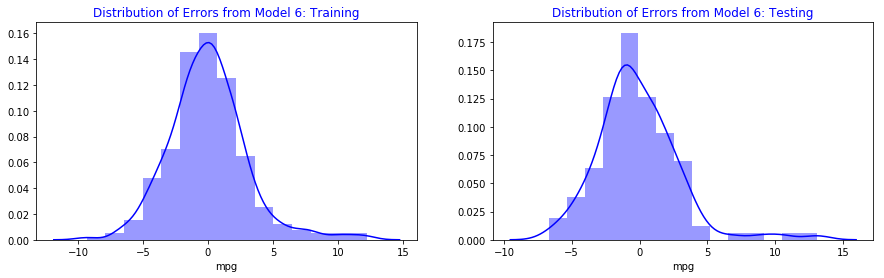

In [90]:
fig, ax1 = plt.subplots(figsize=(15,4))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Errors from Model 6: Training', color='b')
sns.distplot((y_train-train_predictionsM6),bins=15, color='b')
ax1 = plt.subplot(122)
ax1.set_title('Distribution of Errors from Model 6: Testing', color='b')
sns.distplot((y_test-test_predictionsM6),bins=15, color='b')

In [91]:
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, train_predictionsM6)),4))

Training RMSE: 3.0054


In [92]:
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_predictionsM6)),4))

Testing RMSE: 3.0016


In [93]:
print('R squared (Train):', round(model6.score(X_train, y_train),4), 'Adjusted R squared (Train):',
      round(1 - (1-model6.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4))

R squared (Train): 0.8498 Adjusted R squared (Train): 0.847


In [94]:
print('R squared (Test):', round(model6.score(X_test, y_test),4), 'Adjusted R squared (Test):'
      , round(1 - (1-model6.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4))

R squared (Test): 0.8562 Adjusted R squared (Test): 0.8499


Model fit is relatively the same with or without acceleration, but RMSE on the testing set is slightly lower in Model 4 where acceleration is included so there is no strong evidence that Model 6 should be chosen over Model 4.

### Model 7: Adding EMEA to Model 4

emeaMade was initially omitted because it didn't appear to be as correlated as apacMade after accounting for cylinders- will check this.

In [95]:
X = mpgdata[['weight', 'weightSq', 'acceleration', 'yearsOld',
               'apacMade', 'emeaMade', 'lessthan6cyl']]
y = mpgdata['mpg']

In [96]:
from sklearn.model_selection import train_test_split
# training/testing split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [97]:
from sklearn.linear_model import LinearRegression
model7 = LinearRegression()
model7.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
# print line of best fit for Model 7
print(model7.intercept_)
coeff_df = pd.DataFrame(model7.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

66.2657017936
              Coefficient
weight          -0.020154
weightSq         0.000002
acceleration     0.051811
yearsOld        -0.879992
apacMade         0.714196
emeaMade         1.682847
lessthan6cyl     0.077569


In [99]:
test_predictionsM7 = model7.predict(X_test)
train_predictionsM7 = model7.predict(X_train)

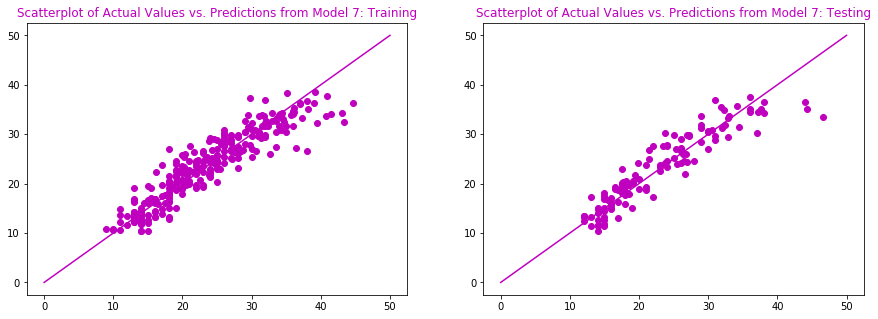

In [100]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Scatterplot of Actual Values vs. Predictions from Model 7: Training', color='m')
plt.scatter(y_train,train_predictionsM7, color='m')
plt.plot([0,50],[0,50], color='m')
ax2 = plt.subplot(122)
ax2.set_title('Scatterplot of Actual Values vs. Predictions from Model 7: Testing', color='m')
plt.scatter(y_test,test_predictionsM7, color='m')
plt.plot([0,50],[0,50], color='m')

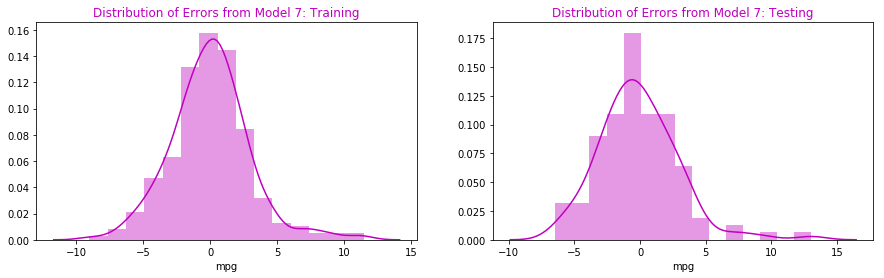

In [101]:
fig, ax1 = plt.subplots(figsize=(15,4))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Errors from Model 7: Training', color='m')
sns.distplot((y_train-train_predictionsM7),bins=15, color='m')
ax1 = plt.subplot(122)
ax1.set_title('Distribution of Errors from Model 7: Testing', color='m')
sns.distplot((y_test-test_predictionsM7),bins=15, color='m')

In [102]:
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, train_predictionsM7)),4))

Training RMSE: 2.9525


In [103]:
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_predictionsM7)),4))

Testing RMSE: 3.0164


In [104]:
print('R squared (Train):', round(model7.score(X_train, y_train),4), 'Adjusted R squared (Train):',
      round(1 - (1-model7.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4))

R squared (Train): 0.855 Adjusted R squared (Train): 0.8513


In [105]:
print('R squared (Test):', round(model7.score(X_test, y_test),4), 'Adjusted R squared (Test):'
      , round(1 - (1-model7.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4))

R squared (Test): 0.8548 Adjusted R squared (Test): 0.8457


While adding emeaMade improves RMSE on the training set, it appears to be a case of overfitting because RMSE is a bit higher than before on the test set.

### Model 8: Adding interaction variable between weight and acceleration

In [106]:
mpgdata['accWeightInt'] = mpgdata['weight']*mpgdata['acceleration']
mpgdata[['weight', 'acceleration', 'accWeightInt']].head(10)

,weight,acceleration,accWeightInt
0,3504,12.0,42048.0
1,3693,11.5,42469.5
2,3436,11.0,37796.0
3,3433,12.0,41196.0
4,3449,10.5,36214.5
5,4341,10.0,43410.0
6,4354,9.0,39186.0
7,4312,8.5,36652.0
8,4425,10.0,44250.0
9,3850,8.5,32725.0


In [107]:
X = mpgdata[['weight', 'weightSq', 'acceleration', 'yearsOld',
               'apacMade', 'lessthan6cyl', 'accWeightInt']]
y = mpgdata['mpg']

In [108]:
from sklearn.model_selection import train_test_split
# training/testing split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [109]:
from sklearn.linear_model import LinearRegression
model8 = LinearRegression()
model8.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
# print line of best fit for Model 8
print(model8.intercept_)
coeff_df = pd.DataFrame(model8.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

59.4342063282
              Coefficient
weight          -0.017402
weightSq         0.000002
acceleration     0.402430
yearsOld        -0.861520
apacMade        -0.021542
lessthan6cyl     0.722723
accWeightInt    -0.000112


In [111]:
test_predictionsM8 = model8.predict(X_test)
train_predictionsM8 = model8.predict(X_train)

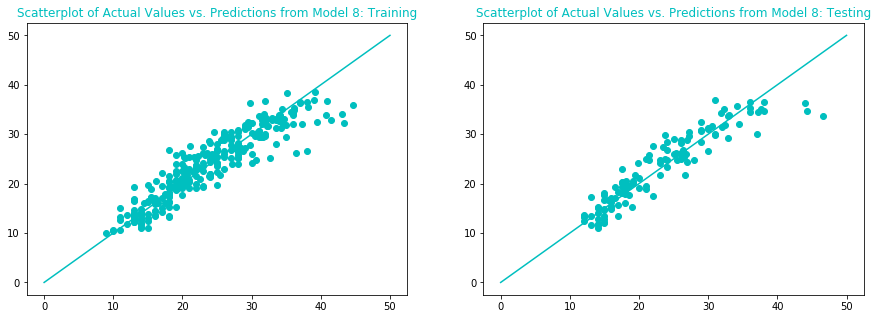

In [112]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Scatterplot of Actual Values vs. Predictions from Model 8: Training', color='c')
plt.scatter(y_train,train_predictionsM8, color='c')
plt.plot([0,50],[0,50], color='c')
ax2 = plt.subplot(122)
ax2.set_title('Scatterplot of Actual Values vs. Predictions from Model 8: Testing', color='c')
plt.scatter(y_test,test_predictionsM8, color='c')
plt.plot([0,50],[0,50], color='c')

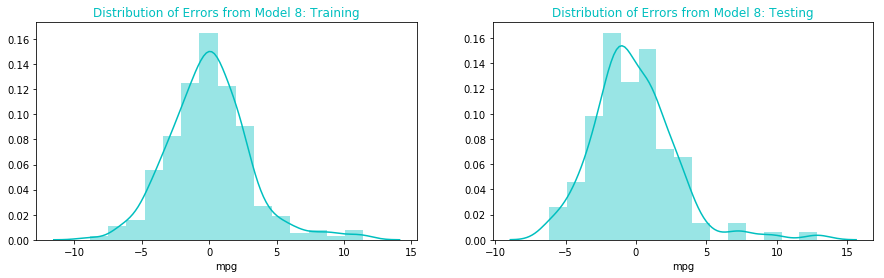

In [113]:
fig, ax1 = plt.subplots(figsize=(15,4))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Errors from Model 8: Training', color='c')
sns.distplot((y_train-train_predictionsM8),bins=15, color='c')
ax1 = plt.subplot(122)
ax1.set_title('Distribution of Errors from Model 8: Testing', color='c')
sns.distplot((y_test-test_predictionsM8),bins=15, color='c')

In [114]:
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, train_predictionsM8)),4))

Training RMSE: 2.9935


In [115]:
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_predictionsM8)),4))

Testing RMSE: 2.926


In [116]:
print('R squared (Train):', round(model8.score(X_train, y_train),4), 'Adjusted R squared (Train):',
      round(1 - (1-model8.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4))

R squared (Train): 0.851 Adjusted R squared (Train): 0.8471


In [117]:
print('R squared (Test):', round(model8.score(X_test, y_test),4), 'Adjusted R squared (Test):'
      , round(1 - (1-model8.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4))

R squared (Test): 0.8634 Adjusted R squared (Test): 0.8549


Testing RMSE is lower and adjusted rsquared is higher than with Model 4, indicating that Model 8 may be a better model.

Now, checking to see if the interaction has made weight or acceleration insignificant on their own.

In [118]:
print(X.columns, f_regression(X,y))

Index(['weight', 'weightSq', 'acceleration', 'yearsOld', 'apacMade',
       'lessthan6cyl', 'accWeightInt'],
      dtype='object') (array([ 888.85068265,  733.47006835,   84.95770025,  199.98200802,
         96.24236669,  538.83311725,  206.02047136]), array([  2.97279956e-103,   3.71901813e-092,   1.82309154e-018,
         4.84493581e-037,   1.75813203e-020,   7.24364317e-076,
         6.51948594e-038]))


Still showing all p-values as significant. Checking to see if adjusted R squared will go up with removal of acceleration.

### Model 9: Model 8 without acceleration

In [119]:
X = mpgdata[['weight', 'weightSq', 'yearsOld',
               'apacMade', 'lessthan6cyl', 'accWeightInt']]
y = mpgdata['mpg']

In [120]:
from sklearn.model_selection import train_test_split
# training/testing split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [121]:
from sklearn.linear_model import LinearRegression
model9 = LinearRegression()
model9.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
# print line of best fit for Model 9
print(model9.intercept_)
coeff_df = pd.DataFrame(model9.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

66.866028928
              Coefficient
weight          -0.020222
weightSq         0.000002
yearsOld        -0.854792
apacMade         0.011490
lessthan6cyl     0.783997
accWeightInt     0.000014


In [123]:
test_predictionsM9 = model9.predict(X_test)
train_predictionsM9 = model9.predict(X_train)

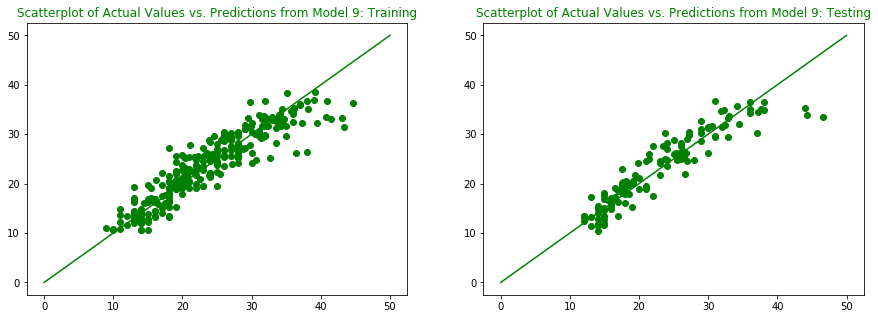

In [124]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Scatterplot of Actual Values vs. Predictions from Model 9: Training', color='g')
plt.scatter(y_train,train_predictionsM9, color='g')
plt.plot([0,50],[0,50], color='g')
ax2 = plt.subplot(122)
ax2.set_title('Scatterplot of Actual Values vs. Predictions from Model 9: Testing', color='g')
plt.scatter(y_test,test_predictionsM9, color='g')
plt.plot([0,50],[0,50], color='g')

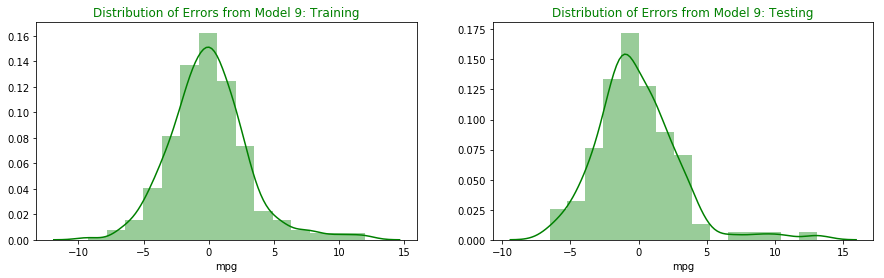

In [125]:
fig, ax1 = plt.subplots(figsize=(15,4))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Errors from Model 9: Training', color='g')
sns.distplot((y_train-train_predictionsM9),bins=15, color='g')
ax1 = plt.subplot(122)
ax1.set_title('Distribution of Errors from Model 9: Testing', color='g')
sns.distplot((y_test-test_predictionsM9),bins=15, color='g')

In [126]:
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, train_predictionsM9)),4))

Training RMSE: 3.0036


In [127]:
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_predictionsM9)),4))

Testing RMSE: 2.9943


In [128]:
print('R squared (Train):', round(model9.score(X_train, y_train),4), 'Adjusted R squared (Train):',
      round(1 - (1-model9.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4))

R squared (Train): 0.85 Adjusted R squared (Train): 0.8466


In [129]:
print('R squared (Test):', round(model9.score(X_test, y_test),4), 'Adjusted R squared (Test):'
      , round(1 - (1-model9.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4))

R squared (Test): 0.8569 Adjusted R squared (Test): 0.8493


RMSE went up so acceleration on its own should be included.

### Model 10: Model 8 where natural log of mpg is taken

In [130]:
X = mpgdata[['weight', 'weightSq', 'yearsOld',
               'apacMade', 'lessthan6cyl', 'accWeightInt']]
y = np.log(mpgdata['mpg'])

In [131]:
from sklearn.model_selection import train_test_split
# training/testing split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [132]:
from sklearn.linear_model import LinearRegression
model10 = LinearRegression()
model10.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [133]:
# print line of best fit for Model 9
print(model10.intercept_)
coeff_df = pd.DataFrame(model10.coef_,X.columns,columns=['Coefficient'])
print(coeff_df)

4.49259515496
               Coefficient
weight       -5.533657e-04
weightSq      4.067358e-08
yearsOld     -3.362412e-02
apacMade     -4.908139e-03
lessthan6cyl  5.154089e-02
accWeightInt  8.877025e-07


In [134]:
test_predictionsM10 = model10.predict(X_test)
train_predictionsM10 = model10.predict(X_train)

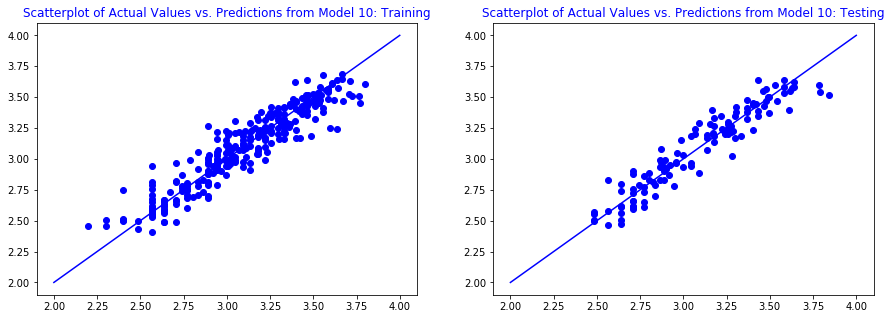

In [135]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Scatterplot of Actual Values vs. Predictions from Model 10: Training', color='b')
plt.scatter(y_train,train_predictionsM10, color='b')
plt.plot([2,4],[2,4], color='b')
ax2 = plt.subplot(122)
ax2.set_title('Scatterplot of Actual Values vs. Predictions from Model 10: Testing', color='b')
plt.scatter(y_test,test_predictionsM10, color='b')
plt.plot([2,4],[2,4], color='b')

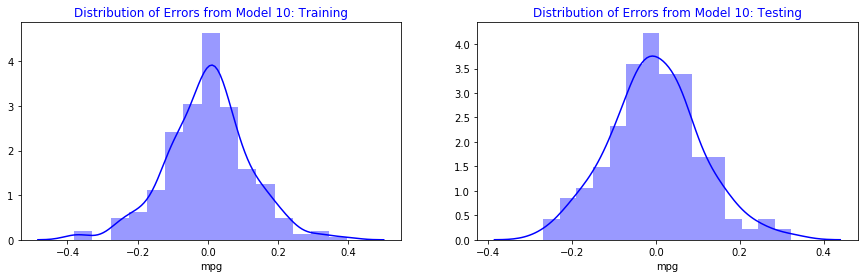

In [136]:
fig, ax1 = plt.subplots(figsize=(15,4))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Errors from Model 10: Training', color='b')
sns.distplot((y_train-train_predictionsM10),bins=15, color='b')
ax1 = plt.subplot(122)
ax1.set_title('Distribution of Errors from Model 10: Testing', color='b')
sns.distplot((y_test-test_predictionsM10),bins=15, color='b')

In [137]:
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, train_predictionsM10)),4))

Training RMSE: 0.1183


In [138]:
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_predictionsM10)),4))

Testing RMSE: 0.1072


In [139]:
print('R squared (Train):', round(model10.score(X_train, y_train),4), 'Adjusted R squared (Train):',
      round(1 - (1-model10.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4))

R squared (Train): 0.8791 Adjusted R squared (Train): 0.8765


In [140]:
print('R squared (Test):', round(model10.score(X_test, y_test),4), 'Adjusted R squared (Test):'
      , round(1 - (1-model10.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4))

R squared (Test): 0.8983 Adjusted R squared (Test): 0.8929


RMSE can't be compared after log transformation but Model 10 has best testing and training R squared and adjusted R squared yet. 

### Model 11: Model 10 with PCA

In [141]:
X = mpgdata[['weight', 'weightSq', 'yearsOld',
               'apacMade', 'lessthan6cyl', 'accWeightInt']]
y = mpgdata['mpg']

In [142]:
from sklearn.model_selection import train_test_split

# training/testing split of 70-30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [143]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the data
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
from sklearn.decomposition import PCA

#Initialize PCA
pca = PCA(.95)

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [145]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [146]:
#create linear model leveraging PCA
from sklearn.linear_model import LinearRegression
model11 = LinearRegression()
model11.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [147]:
test_predictionsM11 = model11.predict(X_test)
train_predictionsM11 = model11.predict(X_train)

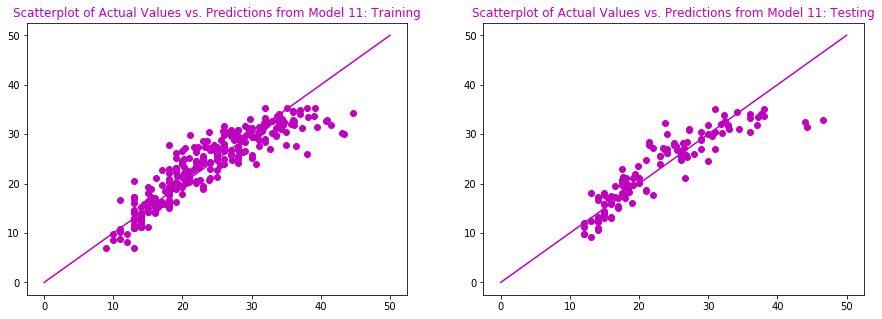

In [148]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.set_title('Scatterplot of Actual Values vs. Predictions from Model 11: Training', color='m')
plt.scatter(y_train,train_predictionsM11, color='m')
plt.plot([0,50],[0,50], color='m')
ax2 = plt.subplot(122)
ax2.set_title('Scatterplot of Actual Values vs. Predictions from Model 11: Testing', color='m')
plt.scatter(y_test,test_predictionsM11, color='m')
plt.plot([0,50],[0,50], color='m')

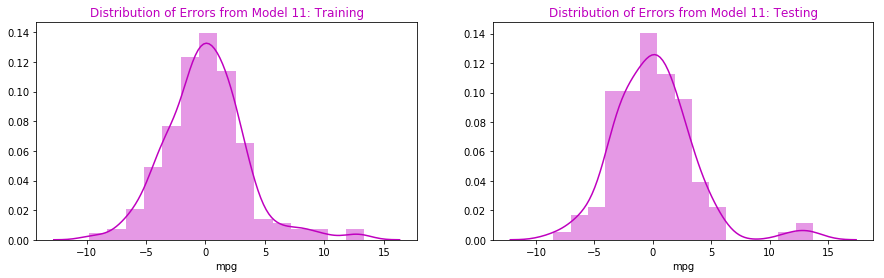

In [149]:
fig, ax1 = plt.subplots(figsize=(15,4))
ax1 = plt.subplot(121)
ax1.set_title('Distribution of Errors from Model 11: Training', color='m')
sns.distplot((y_train-train_predictionsM11),bins=15, color='m')
ax1 = plt.subplot(122)
ax1.set_title('Distribution of Errors from Model 11: Testing', color='m')
sns.distplot((y_test-test_predictionsM11),bins=15, color='m')

In [150]:
print('Training RMSE:', round(np.sqrt(metrics.mean_squared_error(y_train, train_predictionsM11)),4))

Training RMSE: 3.378


In [151]:
print('Testing RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, test_predictionsM11)),4))

Testing RMSE: 3.4147


In [152]:
print('R squared (Train):', round(model11.score(X_train, y_train),4), 'Adjusted R squared (Train):',
      round(1 - (1-model11.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),4))

R squared (Train): 0.8102 Adjusted R squared (Train): 0.8074


In [153]:
print('R squared (Test):', round(model11.score(X_test, y_test),4), 'Adjusted R squared (Test):'
      , round(1 - (1-model11.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),4))

R squared (Test): 0.814 Adjusted R squared (Test): 0.8075


In [154]:
print('PCA- Variance Explained by PC 1:',round(pca.explained_variance_ratio_[0]*100,2)
    , '% | Variance Explained by PC 2:', round(pca.explained_variance_ratio_[1]*100,2) 
    , '% | Variance Explained by PC 3:', round(pca.explained_variance_ratio_[2]*100,2) 
    , '% | Variance Explained by PC 4:', round(pca.explained_variance_ratio_[3]*100,2) 
    , '%' )

PCA- Variance Explained by PC 1: 61.46 % | Variance Explained by PC 2: 15.74 % | Variance Explained by PC 3: 12.55 % | Variance Explained by PC 4: 6.39 %


Fit is not as good as with previous models- RMSE is higher for Training and Testing data and R squared is lower.

## Conclusion

Model 10 appears to be the best model for this predicting MPG from the available factors. Before settling on this model, I'd like to check quickly for heteroskedasticity.

Text(0,0.5,'Residuals')

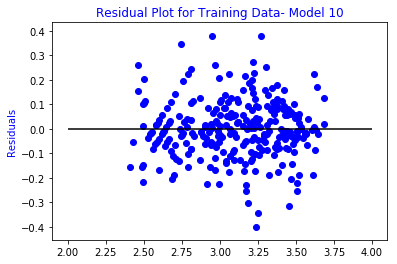

In [155]:
plt.scatter(train_predictionsM10, train_predictionsM10-np.log(y_train), color='b')
plt.hlines(y=0, xmin=2, xmax=4)
plt.title('Residual Plot for Training Data- Model 10', color='b')
plt.ylabel('Residuals', color='b')

Text(0,0.5,'Residuals')

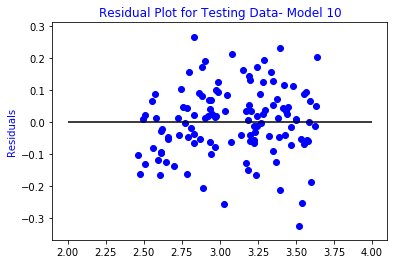

In [156]:
plt.scatter(test_predictionsM10, test_predictionsM10-np.log(y_test), color='b')
plt.hlines(y=0, xmin=2, xmax=4)
plt.title('Residual Plot for Testing Data- Model 10', color='b')
plt.ylabel('Residuals', color='b')

Errors have rectangular shape so no there evidence of heteroskedasticity. Model 10 is the ideal Linear Regression Model for this problem!